In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# importing the historical day ahead and real time locational marginal prices
lmp2017 = pd.read_csv('data/rt_da_monthly_lmps_2017_PEPCO.csv')
lmp2018 = pd.read_csv('data/rt_da_monthly_lmps_2018_PEPCO.csv')
lmp2019 = pd.read_csv('data/rt_da_monthly_lmps_2019_PEPCO.csv')
settled_lmps = lmp2017.append(lmp2018)
settled_lmps = settled_lmps.append(lmp2019)

In [3]:
settled_lmps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24817 entries, 0 to 7294
Data columns (total 16 columns):
datetime_beginning_utc    24817 non-null object
datetime_beginning_ept    24817 non-null object
pnode_id                  24817 non-null int64
pnode_name                24817 non-null object
voltage                   0 non-null float64
equipment                 0 non-null float64
type                      24817 non-null object
zone                      0 non-null float64
system_energy_price_rt    24817 non-null float64
total_lmp_rt              24817 non-null float64
congestion_price_rt       24817 non-null float64
marginal_loss_price_rt    24817 non-null float64
system_energy_price_da    24817 non-null float64
total_lmp_da              24817 non-null float64
congestion_price_da       24817 non-null float64
marginal_loss_price_da    24817 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 3.2+ MB


In [4]:
# removing unneccessary columns
settled_lmps.drop(columns=['voltage',
                           'equipment',
                           'type',
                           'zone'], inplace=True)

In [5]:
settled_lmps.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,51298,PEPCO,259.89,302.561027,31.023376,11.647651,84.49,99.388942,12.280909,2.618033
1,1/1/2018 4:00:00 AM,12/31/2017 11:00:00 PM,51298,PEPCO,223.52,302.496302,68.748150,10.228152,69.22,77.966387,7.057381,1.689006
2,1/1/2018 3:00:00 AM,12/31/2017 10:00:00 PM,51298,PEPCO,92.42,118.970697,22.233111,4.317586,84.47,108.542859,21.974651,2.098208
3,1/1/2018 2:00:00 AM,12/31/2017 9:00:00 PM,51298,PEPCO,77.90,102.891911,21.193832,3.798079,84.66,108.072090,21.260838,2.151252
4,1/1/2018 1:00:00 AM,12/31/2017 8:00:00 PM,51298,PEPCO,69.40,97.771180,24.952113,3.419067,91.58,113.986316,20.122282,2.284034


In [6]:
# converting select columns to datetime
settled_lmps['datetime_beginning_utc'] = pd.to_datetime(settled_lmps['datetime_beginning_utc'])
settled_lmps['datetime_beginning_ept'] = pd.to_datetime(settled_lmps['datetime_beginning_ept'])

In [7]:
settled_lmps.drop_duplicates(inplace=True)

In [8]:
settled_lmps.sort_values(by='datetime_beginning_utc', inplace=True)
settled_lmps.reset_index(drop=True, inplace=True)

In [9]:
settled_lmps

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,2017-01-01 05:00:00,2017-01-01 00:00:00,51298,PEPCO,25.430000,27.322355,1.107805,0.784549,25.02,27.364613,1.070623,1.273990
1,2017-01-01 06:00:00,2017-01-01 01:00:00,51298,PEPCO,25.760000,26.667883,0.155683,0.752200,24.32,26.248006,0.714199,1.213807
2,2017-01-01 07:00:00,2017-01-01 02:00:00,51298,PEPCO,24.290000,25.184710,0.188069,0.706641,24.17,26.316464,0.912106,1.234358
3,2017-01-01 08:00:00,2017-01-01 03:00:00,51298,PEPCO,23.740000,24.449961,0.095439,0.614522,23.95,26.234945,1.040482,1.244463
4,2017-01-01 09:00:00,2017-01-01 04:00:00,51298,PEPCO,23.330000,23.970234,0.052185,0.588049,24.09,26.219556,0.901653,1.227903
...,...,...,...,...,...,...,...,...,...,...,...,...
24810,2019-10-31 23:00:00,2019-10-31 19:00:00,51298,PEPCO,44.308333,64.620824,19.774818,0.537673,33.61,40.442592,6.693291,0.139301
24811,2019-11-01 00:00:00,2019-10-31 20:00:00,51298,PEPCO,34.110000,43.749605,9.315070,0.324535,33.52,39.750780,6.218231,0.012549
24812,2019-11-01 01:00:00,2019-10-31 21:00:00,51298,PEPCO,29.521667,35.694411,6.063727,0.109018,29.45,35.664129,6.358806,-0.144677
24813,2019-11-01 02:00:00,2019-10-31 22:00:00,51298,PEPCO,24.029167,27.566484,3.514332,0.022986,22.77,26.608556,3.866697,-0.028141


In [10]:
posted_rt_lmps = pd.read_csv('data/rt_hrl_lmps_11_2019_PEPCO.csv')
posted_da_lmps = pd.read_csv('data/da_hrl_lmps_11_2019_PEPCO.csv')

In [11]:
posted_lmps = posted_rt_lmps.drop(columns=['voltage',
                                           'equipment',
                                           'type',
                                           'zone',
                                           'row_is_current',
                                           'version_nbr'])

In [12]:
posted_lmps[['system_energy_price_da',
             'total_lmp_da',
             'congestion_price_da',
             'marginal_loss_price_da']] = posted_da_lmps[['system_energy_price_da',
                                                          'total_lmp_da',
                                                          'congestion_price_da',
                                                          'marginal_loss_price_da']]

In [13]:
posted_lmps['datetime_beginning_utc'] = pd.to_datetime(posted_lmps['datetime_beginning_utc'])
posted_lmps['datetime_beginning_ept'] = pd.to_datetime(posted_lmps['datetime_beginning_ept'])

In [14]:
posted_lmps.drop_duplicates(inplace=True)

In [15]:
lmp_df = settled_lmps.append(posted_lmps)
lmp_df.sort_values(by='datetime_beginning_utc', inplace=True)
lmp_df.reset_index(drop=True, inplace=True)

In [16]:
lmp_df.index = lmp_df['datetime_beginning_utc']
lmp_df.drop(columns='datetime_beginning_utc', inplace=True)

In [17]:
lmp_df.head()

,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
datetime_beginning_utc,,,,,,,,,,,
2017-01-01 05:00:00,2017-01-01 00:00:00,51298,PEPCO,25.43,27.322355,1.107805,0.784549,25.02,27.364613,1.070623,1.273990
2017-01-01 06:00:00,2017-01-01 01:00:00,51298,PEPCO,25.76,26.667883,0.155683,0.752200,24.32,26.248006,0.714199,1.213807
2017-01-01 07:00:00,2017-01-01 02:00:00,51298,PEPCO,24.29,25.184710,0.188069,0.706641,24.17,26.316464,0.912106,1.234358
2017-01-01 08:00:00,2017-01-01 03:00:00,51298,PEPCO,23.74,24.449961,0.095439,0.614522,23.95,26.234945,1.040482,1.244463
2017-01-01 09:00:00,2017-01-01 04:00:00,51298,PEPCO,23.33,23.970234,0.052185,0.588049,24.09,26.219556,0.901653,1.227903


In [18]:
lmp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25296 entries, 2017-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 11 columns):
datetime_beginning_ept    25296 non-null datetime64[ns]
pnode_id                  25296 non-null int64
pnode_name                25296 non-null object
system_energy_price_rt    25296 non-null float64
total_lmp_rt              25296 non-null float64
congestion_price_rt       25296 non-null float64
marginal_loss_price_rt    25296 non-null float64
system_energy_price_da    25296 non-null float64
total_lmp_da              25296 non-null float64
congestion_price_da       25296 non-null float64
marginal_loss_price_da    25296 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 2.3+ MB


In [19]:
lmp_df.describe()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
count,25296.0,25296.000000,25296.000000,25296.000000,25296.000000,25296.000000,25296.000000,25296.000000,25296.000000
mean,51298.0,30.654254,33.298536,2.013700,0.630592,30.628647,33.591934,2.346648,0.616638
std,0.0,23.877900,30.303065,9.212808,0.922378,16.053076,19.574047,4.417895,0.670630
min,51298.0,-52.768333,-53.471480,-109.388085,-5.326984,8.740000,10.190882,-41.624613,-1.382850
25%,51298.0,21.307500,22.485985,0.000000,0.227803,22.200000,23.722359,0.325799,0.255834
50%,51298.0,25.351250,26.979210,0.085810,0.455830,27.230000,29.429362,1.279958,0.495210
75%,51298.0,32.207708,34.070525,2.149521,0.780566,34.540000,37.797110,3.008833,0.816684
max,51298.0,690.027500,953.119790,287.993853,27.531492,294.830000,385.995223,95.276622,11.172696


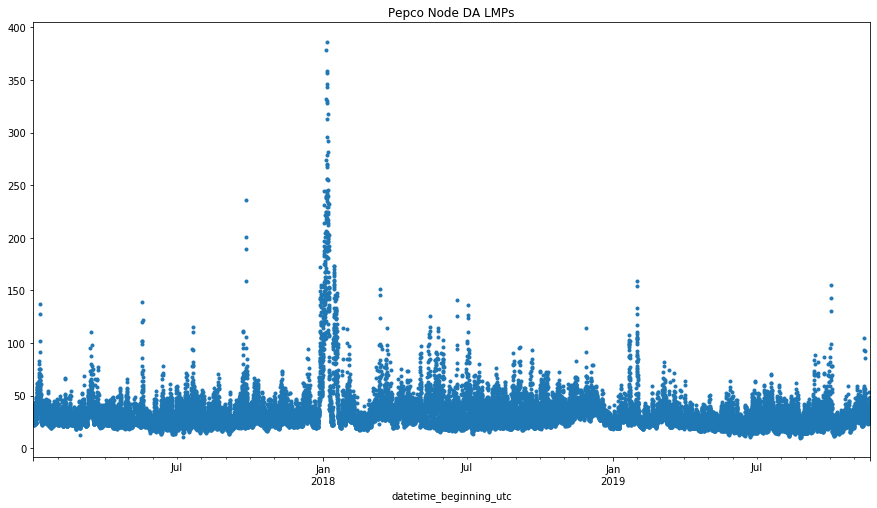

In [20]:
lmp_df['total_lmp_da'].plot(style='.', figsize=(15,8), title="Pepco Node DA LMPs");

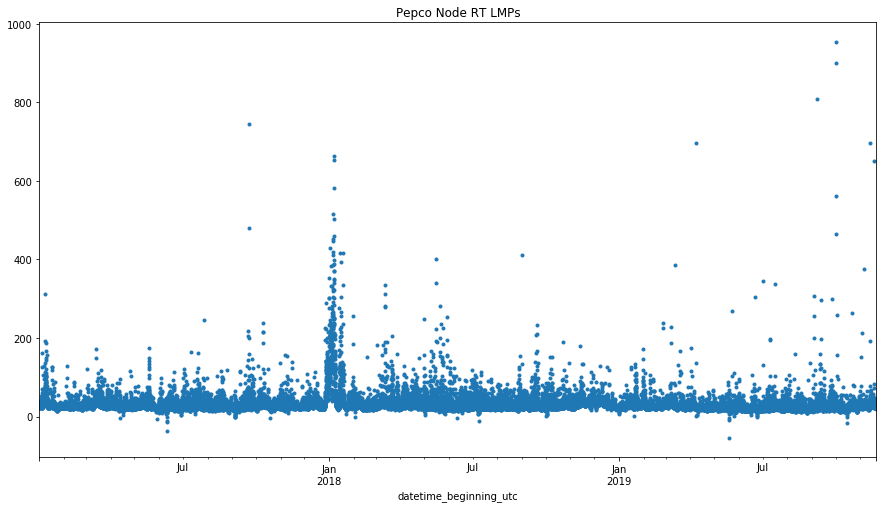

In [21]:
lmp_df['total_lmp_rt'].plot(style='.', figsize=(15,8), title="Pepco Node RT LMPs");

In [22]:
# load data

In [23]:
pepco_load_2017 = pd.read_csv('data/hrl_load_metered_2017_PEPCO.csv')
pepco_load_2018 = pd.read_csv('data/hrl_load_metered_2018_PEPCO.csv')
pepco_load_2019 = pd.read_csv('data/hrl_load_metered_2019_PEPCO.csv')
pepco_load = pepco_load_2017.append(pepco_load_2018)
pepco_load = pepco_load.append(pepco_load_2019)

In [24]:
pepco_load.rename({'mw': 'pepco_mw'}, axis=1, inplace=True)

In [25]:
pepco_load.drop(columns=['datetime_beginning_ept',
                         'nerc_region',
                         'mkt_region',
                         'zone',
                         'load_area',
                         'is_verified'], inplace=True)

In [26]:
pepco_load['datetime_beginning_utc'] = pd.to_datetime(pepco_load['datetime_beginning_utc'])

In [27]:
pepco_load.drop_duplicates(inplace=True)

In [28]:
pepco_load.sort_values(by='datetime_beginning_utc', inplace=True)
pepco_load.index = pepco_load['datetime_beginning_utc']
pepco_load.drop(columns='datetime_beginning_utc', inplace=True)

In [29]:
pepco_load.head()

,pepco_mw
datetime_beginning_utc,
2017-01-01 05:00:00,2579.702
2017-01-01 06:00:00,2484.239
2017-01-01 07:00:00,2456.683
2017-01-01 08:00:00,2417.841
2017-01-01 09:00:00,2429.567


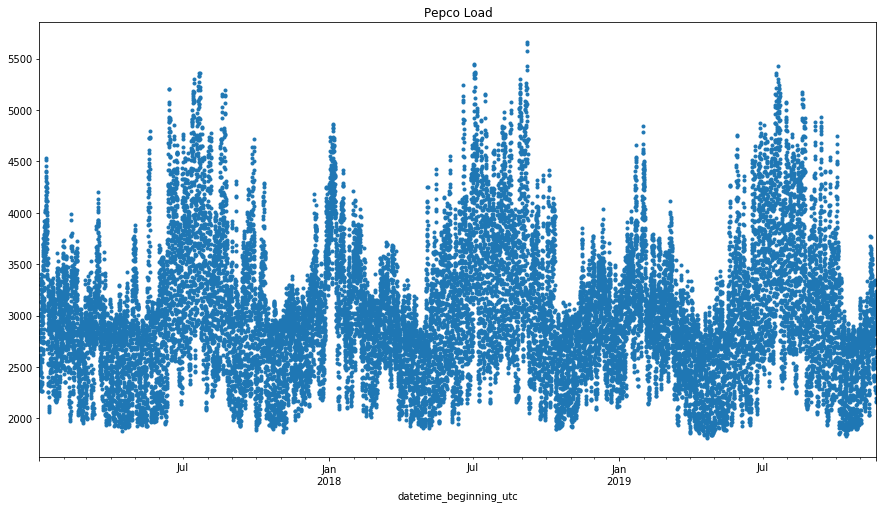

In [30]:
pepco_load['pepco_mw'].plot(style='.', figsize=(15,8), title="Pepco Load");

In [31]:
midatl_load_2017 = pd.read_csv('data/hrl_load_metered_2017_MIDATL.csv')
midatl_load_2018 = pd.read_csv('data/hrl_load_metered_2018_MIDATL.csv')
midatl_load_2019 = pd.read_csv('data/hrl_load_metered_2019_MIDATL.csv')
midatl_load = midatl_load_2017.append(midatl_load_2018)
midatl_load = midatl_load.append(midatl_load_2019)

In [32]:
midatl_load.rename({'mw': 'midatl_mw'}, axis=1, inplace=True)

In [33]:
midatl_load.drop(columns=['datetime_beginning_ept',
                          'nerc_region',
                          'mkt_region',
                          'zone',
                          'load_area',
                          'is_verified'], inplace=True)

In [34]:
midatl_load['datetime_beginning_utc'] = pd.to_datetime(midatl_load['datetime_beginning_utc'])

In [35]:
midatl_load.drop_duplicates(inplace=True)

In [36]:
midatl_load.sort_values(by='datetime_beginning_utc', inplace=True)
midatl_load.index = midatl_load['datetime_beginning_utc']

In [37]:
midatl_load = midatl_load.resample('1H').sum()

In [38]:
load_df = pepco_load.merge(midatl_load, how='left', left_index=True, right_index=True)

In [39]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25296 entries, 2017-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 2 columns):
pepco_mw     25296 non-null float64
midatl_mw    25296 non-null float64
dtypes: float64(2)
memory usage: 1.8 MB


In [40]:
load_df.head()

,pepco_mw,midatl_mw
datetime_beginning_utc,,
2017-01-01 05:00:00,2579.702,26880.242
2017-01-01 06:00:00,2484.239,25849.235
2017-01-01 07:00:00,2456.683,25039.567
2017-01-01 08:00:00,2417.841,24637.405
2017-01-01 09:00:00,2429.567,24616.250


In [41]:
midatl_frcstd_load_2017 = pd.read_csv('data/load_frcstd_hist_2017_MIDATL.csv')
midatl_frcstd_load_2018 = pd.read_csv('data/load_frcstd_hist_2018_MIDATL.csv')
midatl_frcstd_load_2019 = pd.read_csv('data/load_frcstd_hist_2019_MIDATL.csv')
midatl_frcstd_load = midatl_frcstd_load_2017.append(midatl_frcstd_load_2018)
midatl_frcstd_load = midatl_frcstd_load.append(midatl_frcstd_load_2019)

In [42]:
midatl_frcstd_load.rename({'forecast_load_mw': 'midatl_forecast_load_mw'}, axis=1, inplace=True)

In [43]:
midatl_frcstd_load.drop(columns=['forecast_hour_beginning_ept',
                                 'forecast_area'], inplace=True)

In [44]:
midatl_frcstd_load['evaluated_at_utc'] = pd.to_datetime(midatl_frcstd_load['evaluated_at_utc'])
midatl_frcstd_load['evaluated_at_ept'] = pd.to_datetime(midatl_frcstd_load['evaluated_at_ept'])
midatl_frcstd_load['forecast_hour_beginning_utc'] = pd.to_datetime(midatl_frcstd_load['forecast_hour_beginning_utc'])

In [45]:
midatl_frcstd_load.drop_duplicates(inplace=True)

In [46]:
midatl_frcstd_load.sort_values(by=['forecast_hour_beginning_utc', 'evaluated_at_utc'], inplace=True)
midatl_frcstd_load.reset_index(drop=True, inplace=True)

In [47]:
# selecting the oldest forecast for simplicity and to limit data leakage
hrly_midatl_frcstd_load = midatl_frcstd_load.groupby(by='forecast_hour_beginning_utc').idxmin()
midatl_frcstd_load = midatl_frcstd_load.iloc[hrly_midatl_frcstd_load.iloc[:,0]]

In [48]:
midatl_frcstd_load.index = midatl_frcstd_load['forecast_hour_beginning_utc']
midatl_frcstd_load.drop(columns=['forecast_hour_beginning_utc'], inplace=True)

In [49]:
midatl_frcstd_load.head()

,evaluated_at_utc,evaluated_at_ept,midatl_forecast_load_mw
forecast_hour_beginning_utc,,,
2017-01-01 05:00:00,2017-01-01 10:45:00,2017-01-01 05:45:00,27195
2017-01-01 06:00:00,2017-01-01 10:45:00,2017-01-01 05:45:00,26174
2017-01-01 07:00:00,2017-01-01 10:45:00,2017-01-01 05:45:00,25460
2017-01-01 08:00:00,2017-01-01 10:45:00,2017-01-01 05:45:00,24995
2017-01-01 09:00:00,2017-01-01 10:45:00,2017-01-01 05:45:00,24924


In [50]:
load_df = load_df.merge(midatl_frcstd_load, how='left', left_index=True, right_index=True)

In [51]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25296 entries, 2017-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 5 columns):
pepco_mw                   25296 non-null float64
midatl_mw                  25296 non-null float64
evaluated_at_utc           25296 non-null datetime64[ns]
evaluated_at_ept           25296 non-null datetime64[ns]
midatl_forecast_load_mw    25296 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 2.4 MB


In [52]:
load_df.tail()

,pepco_mw,midatl_mw,evaluated_at_utc,evaluated_at_ept,midatl_forecast_load_mw
datetime_beginning_utc,,,,,
2019-11-21 00:00:00,3058.263,33498.709,2019-11-19 10:45:00,2019-11-19 05:45:00,33966
2019-11-21 01:00:00,2971.795,32658.387,2019-11-19 10:45:00,2019-11-19 05:45:00,32979
2019-11-21 02:00:00,2829.161,31248.858,2019-11-19 10:45:00,2019-11-19 05:45:00,31511
2019-11-21 03:00:00,2650.363,29184.714,2019-11-19 10:45:00,2019-11-19 05:45:00,29481
2019-11-21 04:00:00,2487.477,27440.844,2019-11-19 10:45:00,2019-11-19 05:45:00,27716


In [53]:
lmp_df.tail()

,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
datetime_beginning_utc,,,,,,,,,,,
2019-11-21 00:00:00,2019-11-20 19:00:00,51298,PEPCO,22.66,24.244510,0.955136,0.631041,32.25,37.603160,5.064800,0.288360
2019-11-21 01:00:00,2019-11-20 20:00:00,51298,PEPCO,23.98,24.658104,0.006310,0.672627,31.85,37.131499,4.987413,0.294086
2019-11-21 02:00:00,2019-11-20 21:00:00,51298,PEPCO,24.23,24.220312,-0.676727,0.667872,25.88,29.152662,3.082246,0.190416
2019-11-21 03:00:00,2019-11-20 22:00:00,51298,PEPCO,20.14,21.625209,0.906794,0.579248,23.53,25.994099,2.257015,0.207084
2019-11-21 04:00:00,2019-11-20 23:00:00,51298,PEPCO,20.01,21.993846,1.293597,0.686916,22.80,24.651011,1.802089,0.048922


In [54]:
data_df = lmp_df.merge(load_df, how='left', left_index=True, right_index=True)
data_df.index.name = 'datetime_beginning_utc'

In [55]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25296 entries, 2017-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 16 columns):
datetime_beginning_ept     25296 non-null datetime64[ns]
pnode_id                   25296 non-null int64
pnode_name                 25296 non-null object
system_energy_price_rt     25296 non-null float64
total_lmp_rt               25296 non-null float64
congestion_price_rt        25296 non-null float64
marginal_loss_price_rt     25296 non-null float64
system_energy_price_da     25296 non-null float64
total_lmp_da               25296 non-null float64
congestion_price_da        25296 non-null float64
marginal_loss_price_da     25296 non-null float64
pepco_mw                   25296 non-null float64
midatl_mw                  25296 non-null float64
evaluated_at_utc           25296 non-null datetime64[ns]
evaluated_at_ept           25296 non-null datetime64[ns]
midatl_forecast_load_mw    25296 non-null int64
dtypes: datetime64[ns](3), float64(10), 

In [56]:
# interface data

In [57]:
interface_flows_2017 = pd.read_csv('data/da_interface_flows_and_limits_2017.csv')
interface_flows_2018 = pd.read_csv('data/da_interface_flows_and_limits_2018.csv')
interface_flows_2019 = pd.read_csv('data/da_interface_flows_and_limits_2019.csv')
interface_flows = interface_flows_2017.append(interface_flows_2018)
interface_flows = interface_flows.append(interface_flows_2019)

In [58]:
interface_flows.tail()

,datetime_beginning_utc,datetime_beginning_ept,interface_limit_name,flow_mw,limit_mw
7795,11/22/2019 12:00:00 AM,11/21/2019 7:00:00 PM,BCPEP,3758,5200
7796,11/22/2019 1:00:00 AM,11/21/2019 8:00:00 PM,BCPEP,3718,5200
7797,11/22/2019 2:00:00 AM,11/21/2019 9:00:00 PM,BCPEP,3640,5200
7798,11/22/2019 3:00:00 AM,11/21/2019 10:00:00 PM,BCPEP,3141,5200
7799,11/22/2019 4:00:00 AM,11/21/2019 11:00:00 PM,BCPEP,3116,4900


In [59]:
interface_flows.rename({'flow_mw': 'bcpep_flow_mw', 'limit_mw': 'bcpep_limit_mw'},
                       axis=1,
                       inplace=True)

In [60]:
interface_flows.drop(columns=['datetime_beginning_ept'], inplace=True)

In [61]:
interface_flows['datetime_beginning_utc'] = pd.to_datetime(interface_flows['datetime_beginning_utc'])

In [62]:
interface_flows.drop_duplicates(inplace=True)

In [63]:
interface_flows.sort_values(by='datetime_beginning_utc', inplace=True)
interface_flows.index = interface_flows['datetime_beginning_utc']
interface_flows.drop(columns='datetime_beginning_utc', inplace=True)

In [64]:
interface_flows.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25320 entries, 2017-01-01 05:00:00 to 2019-11-22 04:00:00
Data columns (total 3 columns):
interface_limit_name    25320 non-null object
bcpep_flow_mw           25320 non-null int64
bcpep_limit_mw          25320 non-null int64
dtypes: int64(2), object(1)
memory usage: 791.2+ KB


In [65]:
interface_flows.head()

,interface_limit_name,bcpep_flow_mw,bcpep_limit_mw
datetime_beginning_utc,,,
2017-01-01 05:00:00,BCPEP,3523,5700
2017-01-01 06:00:00,BCPEP,3392,5700
2017-01-01 07:00:00,BCPEP,3282,5700
2017-01-01 08:00:00,BCPEP,3123,5700
2017-01-01 09:00:00,BCPEP,3177,5700


In [66]:
data_df = data_df.merge(interface_flows, how='left', left_index=True, right_index=True)

In [67]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25296 entries, 2017-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 19 columns):
datetime_beginning_ept     25296 non-null datetime64[ns]
pnode_id                   25296 non-null int64
pnode_name                 25296 non-null object
system_energy_price_rt     25296 non-null float64
total_lmp_rt               25296 non-null float64
congestion_price_rt        25296 non-null float64
marginal_loss_price_rt     25296 non-null float64
system_energy_price_da     25296 non-null float64
total_lmp_da               25296 non-null float64
congestion_price_da        25296 non-null float64
marginal_loss_price_da     25296 non-null float64
pepco_mw                   25296 non-null float64
midatl_mw                  25296 non-null float64
evaluated_at_utc           25296 non-null datetime64[ns]
evaluated_at_ept           25296 non-null datetime64[ns]
midatl_forecast_load_mw    25296 non-null int64
interface_limit_name       25296 non-nul

In [68]:
# outages data

In [69]:
gen_outages_2017 = pd.read_csv('data/gen_outages_by_type_2017.csv')
gen_outages_2018 = pd.read_csv('data/gen_outages_by_type_2018.csv')
gen_outages_2019 = pd.read_csv('data/gen_outages_by_type_2019.csv')
gen_outages = gen_outages_2017.append(gen_outages_2018)
gen_outages = gen_outages.append(gen_outages_2019)

In [70]:
gen_outages = gen_outages.loc[gen_outages['region']=='Mid Atlantic - Dominion']
gen_outages.drop_duplicates(inplace=True)
gen_outages.drop(columns=['region'], inplace=True)
gen_outages.reset_index(drop=True, inplace=True)

In [71]:
gen_outages['forecast_execution_date_ept'] = pd.to_datetime(gen_outages['forecast_execution_date_ept'])
gen_outages['forecast_date'] = pd.to_datetime(gen_outages['forecast_date'])

In [72]:
gen_outages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 6 columns):
forecast_execution_date_ept    7371 non-null datetime64[ns]
forecast_date                  7371 non-null datetime64[ns]
total_outages_mw               7371 non-null int64
planned_outages_mw             7371 non-null int64
maintenance_outages_mw         7371 non-null int64
forced_outages_mw              7371 non-null int64
dtypes: datetime64[ns](2), int64(4)
memory usage: 345.6 KB


In [73]:
# will use the previous day's forecast
gen_outages['day_delta'] = gen_outages['forecast_date'] - gen_outages['forecast_execution_date_ept']
kept_delta = pd.Timedelta('1 days 00:00:00')

In [74]:
gen_outages = gen_outages.loc[gen_outages['day_delta'] == kept_delta]
gen_outages.drop(columns=['day_delta'], inplace=True)
gen_outages.reset_index(drop=True, inplace=True)

In [75]:
gen_outages.rename({'forecast_execution_date_ept': 'outage_frcst_execution_date',
                    'forecast_date': 'outage_forecast_date'}, axis=1, inplace=True)

In [76]:
gen_outages.sort_values(by='outage_forecast_date', inplace=True)
gen_outages.index = gen_outages['outage_forecast_date']
gen_outages.drop(columns='outage_forecast_date', inplace=True)

In [77]:
gen_outages = gen_outages.resample('H').pad()

In [78]:
gen_outages.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25321 entries, 2017-01-01 00:00:00 to 2019-11-22 00:00:00
Freq: H
Data columns (total 5 columns):
outage_frcst_execution_date    25321 non-null datetime64[ns]
total_outages_mw               25321 non-null int64
planned_outages_mw             25321 non-null int64
maintenance_outages_mw         25321 non-null int64
forced_outages_mw              25321 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.2 MB


In [79]:
gen_outages.head()

,outage_frcst_execution_date,total_outages_mw,planned_outages_mw,maintenance_outages_mw,forced_outages_mw
outage_forecast_date,,,,,
2017-01-01 00:00:00,2016-12-31,4538,1025,2687,826
2017-01-01 01:00:00,2016-12-31,4538,1025,2687,826
2017-01-01 02:00:00,2016-12-31,4538,1025,2687,826
2017-01-01 03:00:00,2016-12-31,4538,1025,2687,826
2017-01-01 04:00:00,2016-12-31,4538,1025,2687,826


In [80]:
data_df = data_df.merge(gen_outages, how='left', left_index=True, right_index=True)

In [81]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25296 entries, 2017-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 24 columns):
datetime_beginning_ept         25296 non-null datetime64[ns]
pnode_id                       25296 non-null int64
pnode_name                     25296 non-null object
system_energy_price_rt         25296 non-null float64
total_lmp_rt                   25296 non-null float64
congestion_price_rt            25296 non-null float64
marginal_loss_price_rt         25296 non-null float64
system_energy_price_da         25296 non-null float64
total_lmp_da                   25296 non-null float64
congestion_price_da            25296 non-null float64
marginal_loss_price_da         25296 non-null float64
pepco_mw                       25296 non-null float64
midatl_mw                      25296 non-null float64
evaluated_at_utc               25296 non-null datetime64[ns]
evaluated_at_ept               25296 non-null datetime64[ns]
midatl_forecast_load_mw     

In [82]:
# weather data

In [83]:
weather_2017_2018 = pd.read_csv('data/KDCA_weather_data_2017-2018.csv')
weather_2019 = pd.read_csv('data/KDCA_weather_data_2019-20191121.csv')
weather = weather_2017_2018.append(weather_2019)

In [84]:
weather.drop(columns=['latitude', 'longitude', 'timezone', 'type', 'summary', 'icon'], inplace=True)

In [85]:
weather['time'] = pd.to_datetime(weather['time'])

In [86]:
weather.drop_duplicates(inplace=True)

In [87]:
weather.sort_values(by='time', inplace=True)
weather.index = weather['time']
weather.drop(columns='time', inplace=True)

In [88]:
weather.interpolate(method='time', axis=0, inplace=True)

In [89]:
# inspected nearby values to confirm this was appropriate
weather['precipType'].loc[(weather['precipType'] == 'none') &
                          (weather['precipIntensity'] > 0)] = 'rain'

C:\Users\natha\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25289 entries, 2017-01-01 05:00:00 to 2019-11-22 04:00:00
Data columns (total 14 columns):
precipIntensity        25289 non-null float64
precipProbability      25289 non-null float64
precipType             25289 non-null object
temperature            25289 non-null float64
apparentTemperature    25289 non-null float64
dewPoint               25289 non-null float64
humidity               25289 non-null float64
pressure               25289 non-null float64
windSpeed              25289 non-null float64
windGust               25289 non-null float64
windBearing            25289 non-null float64
cloudCover             25289 non-null float64
uvIndex                25289 non-null float64
visibility             25289 non-null float64
dtypes: float64(13), object(1)
memory usage: 2.9+ MB


In [91]:
weather.head()

,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility
time,,,,,,,,,,,,,,
2017-01-01 05:00:00,0.0,0.0,none,44.98,43.03,23.12,0.42,1015.0,4.06,9.41,224.0,0.43,0.0,7.669
2017-01-01 06:00:00,0.0,0.0,none,44.64,43.34,23.42,0.43,1015.5,3.27,8.18,235.0,0.89,0.0,7.675
2017-01-01 07:00:00,0.0,0.0,none,43.60,43.60,23.62,0.45,1015.9,1.57,4.75,226.0,0.46,0.0,7.554
2017-01-01 08:00:00,0.0,0.0,none,42.20,42.20,23.83,0.48,1016.6,0.99,3.59,227.0,0.18,0.0,7.535
2017-01-01 09:00:00,0.0,0.0,none,40.60,40.60,23.94,0.51,1017.3,0.68,2.48,253.0,0.02,0.0,7.422


In [92]:
data_df = data_df.merge(weather, how='left', left_index=True, right_index=True)

In [93]:
data_df.interpolate(method='time', axis=0, inplace=True)

In [94]:
data_df['precipType'].loc[(data_df['precipType'].isna()) &
                          (data_df['precipIntensity'] == 0)] = 'none'

In [95]:
# inspected nearby values to confirm this was appropriate
data_df['precipType'].loc[(data_df['precipType'].isna()) &
                          (data_df['precipIntensity'] > 0)] = 'rain'

In [96]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25296 entries, 2017-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 38 columns):
datetime_beginning_ept         25296 non-null datetime64[ns]
pnode_id                       25296 non-null int64
pnode_name                     25296 non-null object
system_energy_price_rt         25296 non-null float64
total_lmp_rt                   25296 non-null float64
congestion_price_rt            25296 non-null float64
marginal_loss_price_rt         25296 non-null float64
system_energy_price_da         25296 non-null float64
total_lmp_da                   25296 non-null float64
congestion_price_da            25296 non-null float64
marginal_loss_price_da         25296 non-null float64
pepco_mw                       25296 non-null float64
midatl_mw                      25296 non-null float64
evaluated_at_utc               25296 non-null datetime64[ns]
evaluated_at_ept               25296 non-null datetime64[ns]
midatl_forecast_load_mw     

In [97]:
# sun data

In [98]:
sun_time_data = pd.read_csv('data/sunset_sunrise_2017-2020.csv')

In [99]:
sun_time_data.drop(columns=['solar_noon_lst', 'sunlight_duration_mins', 'dst_offset'], inplace=True)

In [100]:
sun_time_data['sunrise_datetime_lst'] = sun_time_data['date']+' '+sun_time_data['sunrise_time_lst']
sun_time_data['sunset_datetime_lst'] = sun_time_data['date']+' '+sun_time_data['sunset_time_lst']

In [101]:
sun_time_data['date'] = pd.to_datetime(sun_time_data['date'])
sun_time_data['sunrise_datetime_lst'] = pd.to_datetime(sun_time_data['sunrise_datetime_lst'])
sun_time_data['sunset_datetime_lst'] = pd.to_datetime(sun_time_data['sunset_datetime_lst'])

In [102]:
sun_time_data['utc_offset'] = pd.Timedelta('0 days 05:00:00')
sun_time_data['sunrise_datetime_utc'] = sun_time_data['sunrise_datetime_lst'] + sun_time_data['utc_offset']
sun_time_data['sunset_datetime_utc'] = sun_time_data['sunset_datetime_lst'] + sun_time_data['utc_offset']

In [103]:
sun_time_data = sun_time_data[['date', 'sunrise_datetime_utc', 'sunset_datetime_utc']]

In [104]:
sun_time_data.index = sun_time_data['date']
sun_time_data.drop(columns=['date'], inplace=True)

In [105]:
sun_time_data = sun_time_data.resample('H').pad()

In [106]:
sun_time_data.tail(200)

,sunrise_datetime_utc,sunset_datetime_utc
date,,
2020-12-22 17:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 18:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 19:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 20:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 21:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 22:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 23:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-23 00:00:00,2020-12-23 12:24:15,2020-12-23 21:50:51
2020-12-23 01:00:00,2020-12-23 12:24:15,2020-12-23 21:50:51


In [107]:
data_df = data_df.merge(sun_time_data, how='left', left_index=True, right_index=True)

In [108]:
one_hour = pd.Timedelta('0 days 01:00:00')
zero_hour = pd.Timedelta('0 days 00:00:00')

In [109]:
data_df['sunrise_delta'] = data_df.index + pd.Timedelta('0 days 01:00:00') - data_df['sunrise_datetime_utc']
data_df['sunset_delta'] = data_df['sunset_datetime_utc'] - data_df.index

In [110]:
data_df['sunrise_sunniness'] = data_df['sunrise_delta'].apply(lambda x:
                                                              zero_hour if x < zero_hour
                                                              else min(x, one_hour))
data_df['sunset_sunniness'] = data_df['sunset_delta'].apply(lambda x:
                                                            zero_hour if x < zero_hour
                                                            else min(x, one_hour))

In [111]:
data_df['sunniness'] = pd.DataFrame([data_df['sunrise_sunniness'], data_df['sunset_sunniness']]).min()
data_df['sunniness'] = data_df['sunniness'].dt.total_seconds()

In [112]:
data_df.drop(columns=['sunrise_delta', 'sunset_delta', 'sunrise_sunniness',
                      'sunset_sunniness'], inplace=True)

In [113]:
data_df.head(24)

,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,pepco_mw,midatl_mw,evaluated_at_utc,evaluated_at_ept,midatl_forecast_load_mw,interface_limit_name,bcpep_flow_mw,bcpep_limit_mw,outage_frcst_execution_date,total_outages_mw,planned_outages_mw,maintenance_outages_mw,forced_outages_mw,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,sunrise_datetime_utc,sunset_datetime_utc,sunniness
datetime_beginning_utc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 05:00:00,2017-01-01 00:00:00,51298,PEPCO,25.43,27.322355,1.107805,0.784549,25.02,27.364613,1.070623,1.273990,2579.702,26880.242,2017-01-01 10:45:00,2017-01-01 05:45:00,27195,BCPEP,3523,5700,2016-12-31,4538,1025,2687,826,0.0,0.0,none,44.98,43.03,23.12,0.42,1015.0,4.06,9.41,224.0,0.43,0.0,7.669,2017-01-01 12:26:42,2017-01-01 21:57:07,0.0
2017-01-01 06:00:00,2017-01-01 01:00:00,51298,PEPCO,25.76,26.667883,0.155683,0.752200,24.32,26.248006,0.714199,1.213807,2484.239,25849.235,2017-01-01 10:45:00,2017-01-01 05:45:00,26174,BCPEP,3392,5700,2016-12-31,4538,1025,2687,826,0.0,0.0,none,44.64,43.34,23.42,0.43,1015.5,3.27,8.18,235.0,0.89,0.0,7.675,2017-01-01 12:26:42,2017-01-01 21:57:07,0.0
2017-01-01 07:00:00,2017-01-01 02:00:00,51298,PEPCO,24.29,25.184710,0.188069,0.706641,24.17,26.316464,0.912106,1.234358,2456.683,25039.567,2017-01-01 10:45:00,2017-01-01 05:45:00,25460,BCPEP,3282,5700,2016-12-31,4538,1025,2687,826,0.0,0.0,none,43.60,43.60,23.62,0.45,1015.9,1.57,4.75,226.0,0.46,0.0,7.554,2017-01-01 12:26:42,2017-01-01 21:57:07,0.0
2017-01-01 08:00:00,2017-01-01 03:00:00,51298,PEPCO,23.74,24.449961,0.095439,0.614522,23.95,26.234945,1.040482,1.244463,2417.841,24637.405,2017-01-01 10:45:00,2017-01-01 05:45:00,24995,BCPEP,3123,5700,2016-12-31,4538,1025,2687,826,0.0,0.0,none,42.20,42.20,23.83,0.48,1016.6,0.99,3.59,227.0,0.18,0.0,7.535,2017-01-01 12:26:42,2017-01-01 21:57:07,0.0
2017-01-01 09:00:00,2017-01-01 04:00:00,51298,PEPCO,23.33,23.970234,0.052185,0.588049,24.09,26.219556,0.901653,1.227903,2429.567,24616.250,2017-01-01 10:45:00,2017-01-01 05:45:00,24924,BCPEP,3177,5700,2016-12-31,4538,1025,2687,826,0.0,0.0,none,40.60,40.60,23.94,0.51,1017.3,0.68,2.48,253.0,0.02,0.0,7.422,2017-01-01 12:26:42,2017-01-01 21:57:07,0.0
2017-01-01 10:00:00,2017-01-01 05:00:00,51298,PEPCO,23.72,24.363600,0.037715,0.605885,24.24,27.095335,1.528007,1.327328,2464.898,24973.720,2017-01-01 10:45:00,2017-01-01 05:45:00,25297,BCPEP,3044,5700,2016-12-31,4538,1025,2687,826,0.0,0.0,none,39.74,39.74,24.48,0.54,1018.0,0.34,1.28,255.0,0.27,0.0,7.676,2017-01-01 12:26:42,2017-01-01 21:57:07,0.0
2017-01-01 11:00:00,2017-01-01 06:00:00,51298,PEPCO,23.29,23.961452,0.054825,0.616627,25.20,28.651764,2.127734,1.324030,2502.045,25676.706,2017-01-01 10:45:00,2017-01-01 05:45:00,26095,BCPEP,3601,5700,2016-12-31,4538,1025,2687,826,0.0,0.0,none,38.76,38.76,25.11,0.58,1019.0,0.10,0.68,247.0,0.74,0.0,7.332,2017-01-01 12:26:42,2017-01-01 21:57:07,0.0
2017-01-01 12:00:00,2017-01-01 07:00:00,51298,PEPCO,24.39,25.071923,0.032839,0.649085,25.86,29.323275,2.290401,1.172874,2608.890,26198.004,2017-01-01 10:45:00,2017-01-01 05:45:00,26998,BCPEP,4074,5600,2016-12-31,4538,1025,2687,826,0.0,0.0,none,38.54,38.54,25.75,0.60,1020.0,0.05,0.44,258.5,0.87,0.0,6.216,2017-01-01 12:26:42,2017-01-01 21:57:07,1998.0
2017-01-01 13:00:00,2017-01-01 08:00:00,51298,PEPCO,24.94,27.059033,1.358308,0.760725,26.13,29.265659,1.957270,1.178389,2584.801,26560.641,2017-01-01 10:45:00,2017-01-01 05:45:00,28089,BCPEP,3697,5600,2016-12-31,4538,1025,2687,826,0.0,0.0,none,37.90,37.90,26.13,0.62,1020.8,0.04,0.26,270.0,0.89,0.0,9.997,2017-01-01 12:26:42,2017-01-01 21:57:07,3600.0


In [114]:
data_clean = data_df.drop(columns=['pnode_id', 'pnode_name', 'evaluated_at_utc',
                                   'evaluated_at_ept', 'interface_limit_name',
                                   'sunrise_datetime_utc', 'sunset_datetime_utc',
                                   'outage_frcst_execution_date'])

In [117]:
data_clean.head(24)

,datetime_beginning_ept,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,pepco_mw,midatl_mw,midatl_forecast_load_mw,bcpep_flow_mw,bcpep_limit_mw,total_outages_mw,planned_outages_mw,maintenance_outages_mw,forced_outages_mw,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,sunniness
datetime_beginning_utc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 05:00:00,2017-01-01 00:00:00,25.43,27.322355,1.107805,0.784549,25.02,27.364613,1.070623,1.273990,2579.702,26880.242,27195,3523,5700,4538,1025,2687,826,0.0,0.0,none,44.98,43.03,23.12,0.42,1015.0,4.06,9.41,224.0,0.43,0.0,7.669,0.0
2017-01-01 06:00:00,2017-01-01 01:00:00,25.76,26.667883,0.155683,0.752200,24.32,26.248006,0.714199,1.213807,2484.239,25849.235,26174,3392,5700,4538,1025,2687,826,0.0,0.0,none,44.64,43.34,23.42,0.43,1015.5,3.27,8.18,235.0,0.89,0.0,7.675,0.0
2017-01-01 07:00:00,2017-01-01 02:00:00,24.29,25.184710,0.188069,0.706641,24.17,26.316464,0.912106,1.234358,2456.683,25039.567,25460,3282,5700,4538,1025,2687,826,0.0,0.0,none,43.60,43.60,23.62,0.45,1015.9,1.57,4.75,226.0,0.46,0.0,7.554,0.0
2017-01-01 08:00:00,2017-01-01 03:00:00,23.74,24.449961,0.095439,0.614522,23.95,26.234945,1.040482,1.244463,2417.841,24637.405,24995,3123,5700,4538,1025,2687,826,0.0,0.0,none,42.20,42.20,23.83,0.48,1016.6,0.99,3.59,227.0,0.18,0.0,7.535,0.0
2017-01-01 09:00:00,2017-01-01 04:00:00,23.33,23.970234,0.052185,0.588049,24.09,26.219556,0.901653,1.227903,2429.567,24616.250,24924,3177,5700,4538,1025,2687,826,0.0,0.0,none,40.60,40.60,23.94,0.51,1017.3,0.68,2.48,253.0,0.02,0.0,7.422,0.0
2017-01-01 10:00:00,2017-01-01 05:00:00,23.72,24.363600,0.037715,0.605885,24.24,27.095335,1.528007,1.327328,2464.898,24973.720,25297,3044,5700,4538,1025,2687,826,0.0,0.0,none,39.74,39.74,24.48,0.54,1018.0,0.34,1.28,255.0,0.27,0.0,7.676,0.0
2017-01-01 11:00:00,2017-01-01 06:00:00,23.29,23.961452,0.054825,0.616627,25.20,28.651764,2.127734,1.324030,2502.045,25676.706,26095,3601,5700,4538,1025,2687,826,0.0,0.0,none,38.76,38.76,25.11,0.58,1019.0,0.10,0.68,247.0,0.74,0.0,7.332,0.0
2017-01-01 12:00:00,2017-01-01 07:00:00,24.39,25.071923,0.032839,0.649085,25.86,29.323275,2.290401,1.172874,2608.890,26198.004,26998,4074,5600,4538,1025,2687,826,0.0,0.0,none,38.54,38.54,25.75,0.60,1020.0,0.05,0.44,258.5,0.87,0.0,6.216,1998.0
2017-01-01 13:00:00,2017-01-01 08:00:00,24.94,27.059033,1.358308,0.760725,26.13,29.265659,1.957270,1.178389,2584.801,26560.641,28089,3697,5600,4538,1025,2687,826,0.0,0.0,none,37.90,37.90,26.13,0.62,1020.8,0.04,0.26,270.0,0.89,0.0,9.997,3600.0


In [115]:
data_df.to_csv('data/processed/data.csv')

In [116]:
data_clean.to_csv('data/processed/data.csv')